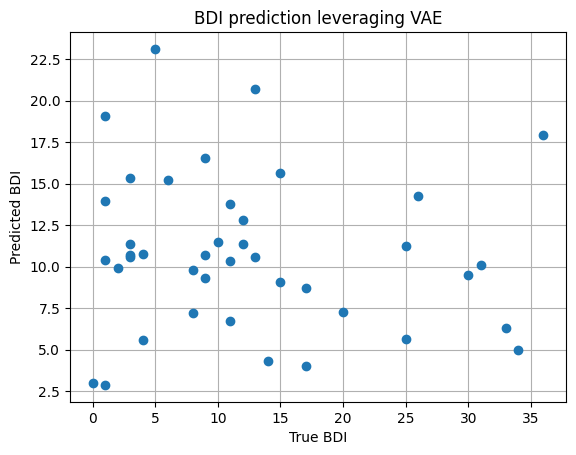

Pearson Correlation Coefficient: -0.10847503815196877
R-squared: -0.33748594322847114
Mean Absolute Error (MAE): 8.983321405038602

LM Statistic: 0.2613359051456533
LM Test p-value: 0.609203852094105
F-Statistic: 0.2501824870091373
F-Test p-value: 0.6197574035757478


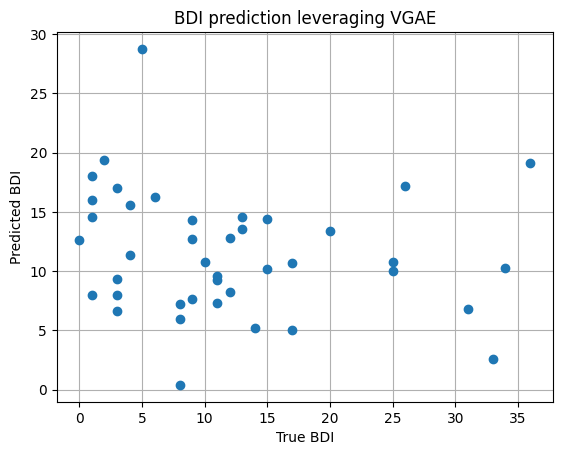

Pearson Correlation Coefficient: -0.16740740429206566
R-squared: -0.46260751879603323
Mean Absolute Error (MAE): 9.073841939612132

LM Statistic: 0.011979250360106719
LM Test p-value: 0.9128457665648072
F-Statistic: 0.01139822698192194
F-Test p-value: 0.915524722843205


In [9]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error    
from sklearn.metrics import r2_score
import statsmodels.api as sm

for model in [
    ('mlp_regularized.txt', 'VAE'),
    ('mlp_regularized_vgae.txt', 'VGAE')
]:
    x_data = []
    y_data = []

    with open(model[0], 'r') as file:
        csv_reader = csv.reader(file, delimiter=',')
        next(csv_reader)  # Skip the header row if present

        for row in csv_reader:
            x_data.append(float(row[1].strip()))  # Assuming column 2 contains x values
            y_data.append(float(row[2].strip()))  # Assuming column 3 contains y values

    # Plot the data
    plt.plot(x_data, y_data, 'o')  # 'o' for scatter plot markers
    plt.xlabel('True BDI')
    plt.ylabel('Predicted BDI')
    plt.title(f'BDI prediction leveraging {model[1]}')
    plt.grid(True)
    plt.show()

    # Assuming x_data and y_data contain the extracted x and y values from the CSV/TXT file

    # Calculate Pearson correlation coefficient
    corr_coeff, _ = pearsonr(x_data, y_data)

    # Calculate mean absolute error (MAE)
    mae = mean_absolute_error(x_data, y_data)

    r2 = r2_score(x_data, y_data)

    # Print the results
    print("Pearson Correlation Coefficient:", corr_coeff)
    print("R-squared:", r2)
    print("Mean Absolute Error (MAE):", mae)
    
    print()
    # Fit the regression model
    X = sm.add_constant(x_data)  # Add a column of ones for the intercept
    model = sm.OLS(y_data, X)
    results = model.fit()
    y_hat = results.predict(X)

    # Calculate the residuals
    residuals = y_data - y_hat

    # Perform the Breusch-Pagan test
    het_test = sm.stats.diagnostic.het_breuschpagan(residuals, X)

    # Extract the test statistics and p-values
    lm, lm_p_value, fvalue, f_p_value = het_test[:4]

    # Print the results
    print(f"LM Statistic: {lm}")
    print(f"LM Test p-value: {lm_p_value}")
    print(f"F-Statistic: {fvalue}")
    print(f"F-Test p-value: {f_p_value}")

There is no strong indication that the variance of the residuals depends on the values of the independent variable in both models.